# Testing Neural Network-based image segmentation models on your data
---
This notebook gives you access to several pre-installed segmentation models that can be easily run and compared on your image data-set. Please follow the instructions below to upload your data and test the models.

The notebook is licensed under CC BY-NC 4.0
Copyright (C) 2024 Franziska Oschmann, Scientific IT Services of ETH Zurich.

Contributing Authors:  Franziska Oschmann  together with  Andrzej Rzepiela (ScopeM ETH) and Szymon Stoma (ScopeM ETH).

# 1. Install dependencies
- The notebook runs on the **L4 accelator**. Select it in 'Runtime' by clicking 'Change runtime type'
- To run a code `cell` (separate piece of code), click on it and press the `play` button on the top left of it.
- It will take about 1 min to install dependencies in the cell below
- Ignore the restart warning message



In [3]:
%%capture
!pip install --no-deps git+https://github.com/ajrzepiela/midap.git@dev
!pip install --no-deps git+https://www.github.com/mouseland/cellpose.git
!pip install -q --no-deps numpy==1.26.4 "scipy>=1.11.4,<1.12" scikit-image>=0.22 \
  opencv-python>=4.8.1 pandas>=2.0.2 stardist>=0.9.1 omnipose>=1.0.6 tqdm gitpython coverage mpl_interactions \
  ipympl csbdeep fastremap edt igraph texttable mgen pbr ncolor mahotas torchvf peakdetect fill_voids roifile segment_anything
try:
  from gem.utils import graph_util, plot_util
except (ImportError, KeyError, ModuleNotFoundError):
  exit()

If you want to use the notebook more often, follow the instructions [here](https://medium.com/@ismailelalaoui/how-to-install-external-libraries-permanently-on-google-colab-eaa4509fb43f) to install dependencies permanently on your google drive

Now, **download the custom segmentation models**. Standard models are loaded from libraries.

In [ ]:
!midap_download --force

## 2. Upload of images



- Run the `cell` below and later select the `data/raw_im/` data folder (don't miss the 'select' button that appears below the cell), and then run the second cell to select the files you want to analyse.

- This will take about 30 sec

- In `/content/data/raw_im/` there are several example images that can be used to test the notebook. If you want other images, upload them to the folder `/content/data/raw_im/`. To do this, in the panel on the left click on the folder icon and then drag and drop your image files into directory `/content/data/raw_im/`.

- Uploaded images should have the same size (the example set is 256x256, you can also remove it)


In [3]:
import os; os.environ["MATPLOTLIB_BACKEND"] = "module://ipympl.backend_nbagg"
import matplotlib
matplotlib.use('module://ipympl.backend_nbagg')
import matplotlib.pyplot as plt

from google.colab import output
output.enable_custom_widget_manager()

%matplotlib ipympl
from midap.midap_jupyter.segmentation_jupyter import SegmentationJupyter

path = '/content/data/'
sj = SegmentationJupyter(path = path)

sj.get_input_dir()
display(sj.fc_file)

FileChooser(path='/content/data', filename='', title='', show_hidden=False, select_desc='Select', change_desc=…

Please make sure that the folder has been selected. Then run the next cell to select the files (mark them with the mouse).

In [4]:
sj.get_input_files(sj.fc_file.selected)

SelectMultiple(description='Files', layout=Layout(height='250px', width='600px'), options=('image_2.tif', 'ima…

Button(description='Select', style=ButtonStyle())

## 3. Choose image axes

This is where we define the labels for the image axes. We need to specify which axes contain the number of images and the number of channels in the uploaded image stack. Based on this information, the image stack will be transformed into the following shape (num_images, width, height, num_channels). Please run the two cells below and select the correct options.

In [5]:
sj.load_input_image()

In [6]:
sj.spec_img_dims()
sj.align_img_dims()

## 2. Select channel

Select the channel which will be used for the further analysis. If images in your set contain only one channel, keep the channel '0'. Please run both cells below.

In [7]:
%matplotlib ipympl
sj.select_channel()
display(sj.output_sel_ch)

interactive(children=(Dropdown(description='Channel', layout=Layout(width='50%'), options=(0,), value=0), IntS…

In [8]:
sj.set_channel()

## 3. Define ROI

Define the region of interest (the same for all the images) by zooming into the part of the image you want to segment (use the 'zoom to rectangle' tool from the tool icons at the left-hand side). Run all the cells below.

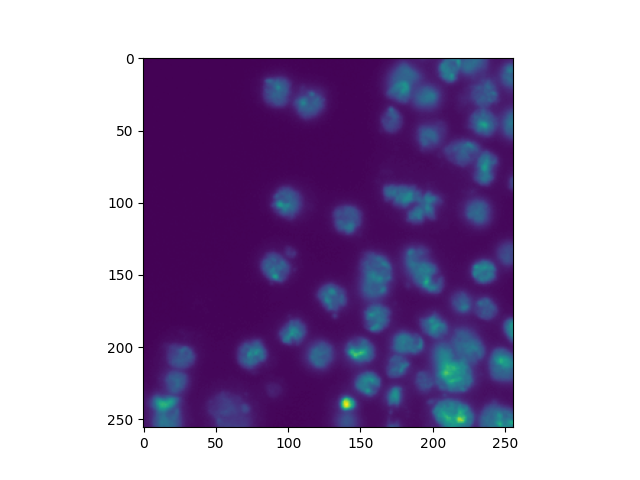

In [9]:
%matplotlib ipympl
sj.show_example_image(sj.imgs_sel_ch[0,:,:,0])

In [10]:
sj.get_corners_cutout()
sj.make_cutouts()

%matplotlib ipympl
sj.show_all_cutouts()
sj.output_all_cuts

interactive(children=(IntSlider(value=0, description='Image ID', max=0), Output()), _dom_classes=('widget-inte…

In [11]:
sj.save_cutouts()

## 4. Model selection

You can choose between different models trained on different species, markers and neural network types. Select the models by running the cell below and clicking through the options (the selected models will appear in the list below the cell).

In [ ]:
sj.get_segmentation_models()
sj.display_segmentation_models()
#sj.outp_interact_table

- By running the following cell, segmentations with all selected models are generated and displayed for comparison.

- This will take some time depending on how many models and images you have

In [ ]:
# run all models
sj.select_segmentation_models()
sj.run_all_chosen_models()

In [ ]:
sj.compare_segmentations()
sj.output_seg_comp

Choose the name of the model weights giving the best segmentation result:

In [ ]:
sj.display_buttons_weights()
display(sj.out_weights)

## 5. Save segmentations

Based on the chosen model and model weights, the whole image stack will be segmented. In case you would like to upload an additional file for the segmentation, please do that below.

In [ ]:
sj.load_add_files()
sj.out_add_file

In [ ]:
sj.process_images()

You find the segmented images under `/content/data/seg_im/`.

## 6. Manou's Sandbox

### I. interactive table for model selection

In [12]:
## import stuff
## NOTE: check that those are not already imported; eventually place at top of notebook

import pandas as pd
import inspect
from google.colab import data_table
from IPython.display import display, clear_output
from google.colab import data_table
import ipywidgets as widgets
from ipywidgets import Layout


#### exploratory

In [13]:
## _____ Let's check what methods and functions SegmentationJupyter (instance 'sj' here) has ____


meth_func = []
data_attrs = []

for name in dir(sj):
    if name.startswith("__") and name.endswith("__"):
        continue
    attr = getattr(sj, name)
    if inspect.ismethod(attr) or inspect.isfunction(attr):
        meth_func.append(name)
    else:
        data_attrs.append(name)

print("____Data attributes____\n")
for name in sorted(data_attrs):
    try:
        val = getattr(sj, name)
        print(f"{name}: {type(val).__name__}")
    except Exception as e:
        print(f"{name}: <error reading: {e}>")

print("\n ____Methods and functions____\n")
for name in sorted(meth_func):
    print(name)

____Data attributes____

ax: Axes
axis_length_dict: dict
button: Button
chosen_dir: str
chosen_files: tuple
dims_assign_dict: dict
fc_file: FileChooser
file_selection: SelectMultiple
hbox_dropdowns: HBox
img_height: int
img_shape: ndarray
img_width: int
imgs: ndarray
imgs_clean: ndarray
imgs_cut: ndarray
imgs_sel_ch: ndarray
ix_diff: list
ix_height: int64
ix_width: int64
name_add_dims: list
output: Output
output_all_cuts: interactive
output_sel_ch: interactive
path: str
path_cut: PosixPath
path_cut_base: PosixPath
path_data: str
path_data_input: str
path_midap: str
path_seg_base: PosixPath
selected_ch: int
x_max: int64
x_min: int64
y_max: int64
y_min: int64

 ____Methods and functions____

align_img_dims
compare_segmentations
compute_model_diff_scores
display_buttons_weights
display_segmentation_models
get_corners_cutout
get_img_dims
get_img_dims_ix
get_input_dir
get_input_files
get_ix_add_dims
get_segmentation_models
get_usern_pw
load_add_files
load_input_image
make_cutouts
make_dropd

In [ ]:
## Pull the registry from SegmentationJupyter (build sj.df_models)
#_ = sj.get_segmentation_models()

In [14]:
## let's get the list of models
sj.get_segmentation_models()
df_model_interact = sj.df_models.copy()
df_model_interact.index.name = "model_name"
df_model_interact = df_model_interact.reset_index()

## check what columns or descriptive fields already exist
df_model_interact.columns.tolist()

['model_name', 'species', 'marker', 'nn_type', 'nn_type_alias']

In [15]:
## take a look at the dataframe listing the available models with the already existing description fields
df_model_interact

,model_name,species,marker,nn_type,nn_type_alias
0,midap_stardist_2D_paper_dsb2018,various,general model,StarDistSegmentation,StarDistSegmentationJupyter
1,midap_stardist_2D_versatile_fluo,various,general model,StarDistSegmentation,StarDistSegmentationJupyter
2,model_weights_nuclei,OmniPose,omni,NaN,OmniSegmentationJupyter
3,model_weights_bact_fluor_omni,OmniPose,omni,NaN,OmniSegmentationJupyter
4,model_weights_bact_phase_omni,OmniPose,omni,NaN,OmniSegmentationJupyter
5,model_weights_worm_omni,OmniPose,omni,NaN,OmniSegmentationJupyter
6,model_weights_worm_bact_omni,OmniPose,omni,NaN,OmniSegmentationJupyter
7,model_weights_cpsam,Cellpose-SAM,cellpose-sam,NaN,CellposeSegmentationJupyter


#### SOLUTION A. DataTable + ipywidget

-- Create a dataframe by concatenating: a) the existing dataframe inherited from SegmentationJupyter (and which has some limited info on what each model is), b) a new dataframe, with infered - by the name of the models - info about each model or hardcoded info.

-- Display this new and expanded model dataframe as a colab DataTable: it has the nice feature of being searchable and reusable (exportable etc.)

-- Use widgets to create separate model list to select from (with filtering option) based on the contents of the table above, and then run the segmentation process with the click of a button.


In [16]:
## let's get the list of models
_ = sj.get_segmentation_models()
df_model_interact = sj.df_models.copy()
df_model_interact.index.name = "model_name"
df_model_interact = df_model_interact.reset_index()


## Add new (fixed) columns the dumm way: check existing model named and infer functionality or features. If # of models remain finite, that is still OK.
## If not, find a clever way to do it

## FUNCTION for INFERRED fields/characteristics of the models based on their name.
## Pure brute force and ignorance. But can serve as the code skeleton.

def infer_from_name(name: str):
    nm = str(name).lower()
    return pd.Series({
        "Family": ("StarDist" if "stardist" in nm else
                            "Omnipose" if "omni" in nm else
                            "Cellpose+SAM" if "cpsam" in nm else None),
        "Target": ("nuclei" if any(k in nm for k in ["nuclei","dsb2018","fluo","stardist"]) else
                            "bacteria" if "bact" in nm else
                            "worm" if "worm" in nm else None),
        "Modality": ("fluorescence" if ("fluo" in nm or "stardist" in nm) else
                              "phase/brightfield" if "phase" in nm else None),
        "Dims": ("2D" if ("omni" in nm or "cellpose" in nm or "cp" in nm) else "1D"),
        "Functionality":"clas/den/seg",
        "Trained on": ("StarDist 2D versatile (fluo)" if "versatile_fluo" in nm else
                                "DSB2018 nuclei" if "dsb2018" in nm else
                                "omnipose corpus" if "omni" in nm else
                                "cellpose+sam generalist" if "cpsam" in nm else None),
        "Good for": ("star-convex nuclei" if "stardist" in nm else
                              "bacteria/elongated cells" if ("bact" in nm or "omni" in nm) else
                              "general cell bodies" if any(t in nm for t in ["cp","cellpose","cpsam"]) else None),
        " NOT good for": ("blah" if "stardist" in nm else
                              "blah" if ("bact" in nm or "omni" in nm) else
                              "blahblah" if any(t in nm for t in ["cp","cellpose","cpsam"]) else None),
        "Channels expected": 2 if "omni" in nm else 2 if ("cellpose" in nm  or 'cp' in nm) else 1,
        "Useful docs": "github.com/stardist/stardist#pretrained-models" if "stardist" in nm else "github.com/kevinjohncutler/omnipose" if "omni" in nm else "github.com/mouseland/cellpose" if any(t in nm for t in ["cp","cellpose","cpsam"]) else None
    })

df_inferred = df_model_interact["model_name"].apply(infer_from_name)
df_model_interact = pd.concat([df_model_interact, df_inferred], axis=1)



## return interactive table with model names and pre-selected known info or specs for each model.
## This is a searchable table, i.e. user can filter based on existing fields.

data_table.DataTable(df_model_interact, include_index=False, num_rows_per_page=10)


,model_name,species,marker,nn_type,nn_type_alias,Family,Target,Modality,Dims,Functionality,Trained on,Good for,NOT good for,Channels expected,Useful docs
0,midap_stardist_2D_paper_dsb2018,various,general model,StarDistSegmentation,StarDistSegmentationJupyter,StarDist,nuclei,fluorescence,1D,clas/den/seg,DSB2018 nuclei,star-convex nuclei,blah,1,github.com/stardist/stardist#pretrained-models
1,midap_stardist_2D_versatile_fluo,various,general model,StarDistSegmentation,StarDistSegmentationJupyter,StarDist,nuclei,fluorescence,1D,clas/den/seg,StarDist 2D versatile (fluo),star-convex nuclei,blah,1,github.com/stardist/stardist#pretrained-models
2,model_weights_nuclei,OmniPose,omni,NaN,OmniSegmentationJupyter,None,nuclei,None,1D,clas/den/seg,None,None,None,1,None
3,model_weights_bact_fluor_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,Omnipose,nuclei,fluorescence,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose
4,model_weights_bact_phase_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,Omnipose,bacteria,phase/brightfield,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose
5,model_weights_worm_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,Omnipose,worm,None,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose
6,model_weights_worm_bact_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,Omnipose,bacteria,None,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose
7,model_weights_cpsam,Cellpose-SAM,cellpose-sam,NaN,CellposeSegmentationJupyter,Cellpose+SAM,None,None,2D,clas/den/seg,cellpose+sam generalist,general cell bodies,blahblah,2,github.com/mouseland/cellpose


In [14]:
df_model_interact = pd.read_csv("model_table.csv")
display(df_model_interact)

,Model Name,Species,Marker,NN type,NN type alias,Version,Family,Target,Modality,Dims,Functionality,Trained on,Good for,NOT good for,Channels expected,Useful docs,Comments
0,midap_stardist_2D_paper_dsb2018,various,general model,StarDistSegmentation,StarDistSegmentationJupyter,-,StarDist,nuclei,fluorescence,1D,clas/den/seg,DSB2018 nuclei,star-convex nuclei,blah,1,github.com/stardist/stardist#pretrained-models,—
1,midap_stardist_2D_versatile_fluo,various,general model,StarDistSegmentation,StarDistSegmentationJupyter,-,StarDist,nuclei,fluorescence,1D,clas/den/seg,StarDist 2D versatile (fluo),star-convex nuclei,blah,1,github.com/stardist/stardist#pretrained-models,—
2,model_weights_nuclei,OmniPose,omni,NaN,OmniSegmentationJupyter,-,NaN,nuclei,NaN,1D,clas/den/seg,NaN,NaN,NaN,1,NaN,—
3,model_weights_bact_fluor_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,-,Omnipose,nuclei,fluorescence,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose,—
4,model_weights_bact_phase_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,-,Omnipose,bacteria,phase/brightfield,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose,—
5,model_weights_worm_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,-,Omnipose,worm,NaN,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose,—
6,model_weights_worm_bact_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,-,Omnipose,bacteria,NaN,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose,—
7,model_weights_cpsam,Cellpose-SAM,cellpose-sam,NaN,CellposeSegmentationJupyter,-,Cellpose+SAM,NaN,NaN,2D,clas/den/seg,cellpose+sam generalist,general cell bodies,blahblah,2,github.com/mouseland/cellpose,—


In [18]:
## return interactive table with model names and pre-selected known info or specs for each model.
## This is a searchable table, i.e. user can filter based on existing fields.
sj.get_segmentation_models()
display(data_table.DataTable(df_model_interact, include_index=False, num_rows_per_page=10))

## Add a selection UI that drives sj.select_segmentation_models()

## 1) Simple and fast selector with search and multi-select
all_names = df_model_interact["Model Name"].astype(str).tolist()

search = widgets.Text(placeholder="filter models with ... (substring match)", layout=Layout(width="40%"))
sel    = widgets.SelectMultiple(options=sorted(all_names), rows=12, description="Select")
btn_all   = widgets.Button(description="Select all (filtered)", tootip='Select all models matching filter keywords')
btn_clear  = widgets.Button(description="Clear", tooltip='Clear selection')
btn_apply = widgets.Button(description="Apply selection",tooltip='Apply selected models')
btn_applyrun   = widgets.Button(description="Apply & run", tooltip='Apply selected models and run segmentation',button_style="primary")
out       = widgets.Output()

def refresh_options(_=None):
    q = search.value.lower().strip()
    opts = [n for n in all_names if q in n.lower()] if q else sorted(all_names)
    ## preserve already-selected items that still match the filter
    current = set(sel.value)
    sel.options = opts
    sel.value = tuple([o for o in opts if o in current])

search.observe(refresh_options, names="value")
refresh_options()

def on_all_clicked(_):
    sel.value = tuple(sel.options)

def on_none_clicked(_):
    sel.value = ()

btn_all.on_click(on_all_clicked)
btn_clear.on_click(on_none_clicked)

## 2) Apply selection to sj.model_checkboxes (expected from sj.select_segmentation_models)
def _apply_selection(run_after=False):
    chosen = set(sel.value)

    sj.model_checkboxes = {
        name: widgets.Checkbox(value=(name in chosen), indent=False, layout=Layout(width="1px", height="1px"))
        for name in all_names
    }

    with out:
        clear_output()
        print(f"Selected {len(chosen)} model(s):")
        for n in sorted(chosen):
            print("  •", n)

    if run_now:
        sj.select_segmentation_models()
        sj.run_all_chosen_models()

def on_apply_clicked(_):
    _apply_selection(run_now=False)

def on_applyrun_clicked(_):
    _apply_selection(run_now=True)

btn_apply.on_click(on_apply_clicked)
btn_applyrun.on_click(on_applyrun_clicked)

## 3) Final: render the selector UI
widgets.VBox([
    widgets.HBox([search, btn_all, btn_clear, btn_apply, btn_applyrun]),
    sel,
    out
])


,Model Name,Species,Marker,NN type,NN type alias,Version,Family,Target,Modality,Dims,Functionality,Trained on,Good for,NOT good for,Channels expected,Useful docs,Comments
0,midap_stardist_2D_paper_dsb2018,various,general model,StarDistSegmentation,StarDistSegmentationJupyter,-,StarDist,nuclei,fluorescence,1D,clas/den/seg,DSB2018 nuclei,star-convex nuclei,blah,1,github.com/stardist/stardist#pretrained-models,—
1,midap_stardist_2D_versatile_fluo,various,general model,StarDistSegmentation,StarDistSegmentationJupyter,-,StarDist,nuclei,fluorescence,1D,clas/den/seg,StarDist 2D versatile (fluo),star-convex nuclei,blah,1,github.com/stardist/stardist#pretrained-models,—
2,model_weights_nuclei,OmniPose,omni,NaN,OmniSegmentationJupyter,-,NaN,nuclei,NaN,1D,clas/den/seg,NaN,NaN,NaN,1,NaN,—
3,model_weights_bact_fluor_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,-,Omnipose,nuclei,fluorescence,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose,—
4,model_weights_bact_phase_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,-,Omnipose,bacteria,phase/brightfield,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose,—
5,model_weights_worm_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,-,Omnipose,worm,NaN,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose,—
6,model_weights_worm_bact_omni,OmniPose,omni,NaN,OmniSegmentationJupyter,-,Omnipose,bacteria,NaN,2D,clas/den/seg,omnipose corpus,bacteria/elongated cells,blah,2,github.com/kevinjohncutler/omnipose,—
7,model_weights_cpsam,Cellpose-SAM,cellpose-sam,NaN,CellposeSegmentationJupyter,-,Cellpose+SAM,NaN,NaN,2D,clas/den/seg,cellpose+sam generalist,general cell bodies,blahblah,2,github.com/mouseland/cellpose,—


TypeError: _apply_selection() got an unexpected keyword argument 'run_now'

**the rest follows as in the original colab , e.g. model comparison, selection of best model, and subsequent outputs.**

In [ ]:
sj.compare_segmentations()
sj.output_seg_comp

In [ ]:
sj.display_buttons_weights()
display(sj.out_weights)

In [ ]:
sj.load_add_files()
sj.out_add_file

In [ ]:
sj.process_images()

### **General comments and TODOs**

+ [ ] Add 'functionality' field (segmentation, classification,denoising)
+ [ ] Get inspiration for fields, terms, tags, etc from biii.eu
+ [ ] There might be no need for both buttons "Apply to sj" and "Apply and Run". Re-think it: is there any forseen user action that after selecting the desired models, does not proceed with running these models on the images determined earlier?
+ [ ] **Color scheme** for ROI etc not the best. How about **grayscale** instead??
+ [ ] DataTable does not render hyperlinks (just keeps the address string). Can use HTML instead, but then the table doesn't have the nice filter functionalities of a DataTable
+ [X] **Useful Docs column**: can add relevant papers too or other useful links. Or decide to keep it simple with just the github links

### **Resources**

- *Omnipose*

https://github.com/kevinjohncutler/omnipose

https://omnipose.readthedocs.io/index.html

- *Cellpose*

https://github.com/mouseland/cellpose

https://cellpose.readthedocs.io/en/latest/index.html


- *Stardist*

https://github.com/stardist/stardist#pretrained-models

## II. Alternative solutions experimentation

A combination of html rendered dataframe with checkboxes and inplace selection
+ [ ] NOTE: here hyperlinks are supported --> use them for documentation links
+ [ ] NOTE: fix 'clear selection' button


In [ ]:
from IPython.display import HTML, display, clear_output
from google.colab import output
import ipywidgets as widgets
from ipywidgets import Layout
import html as _html

# 1) Build the HTML DataFrame with a checkbox column
df_html = df_model_interact.copy()
df_html.insert(0, "Select", [
    f'<input type="checkbox" class="model-box" value="{_html.escape(str(name))}">'
    for name in df_html["model_name"].astype(str)
])

display(HTML(df_html.to_html(escape=False, index=False)))

# 2) Buttons for Apply / Apply & Run / Clear Selection

btn_clear  = widgets.Button(description="Clear Selection")
btn_apply = widgets.Button(description="Apply selection")
btn_applyrun   = widgets.Button(description="Apply & run", button_style="primary")
out       = widgets.Output()


def _get_selected_names():
    js = """
      (function(){
        const boxes = Array.from(document.querySelectorAll('.model-box'));
        return boxes.filter(b => b.checked).map(b => b.value);
      })()
    """
    return output.eval_js(js) or []

def _apply_selection(run_now=False):
    selected = _get_selected_names()

    # Create the structure sj.select_segmentation_models expects
    sj.model_checkboxes = {
        str(name): widgets.Checkbox(
            value=(str(name) in selected),
            indent=False,
            layout=Layout(width="1px", height="1px")
        )
        for name in df_model_interact["model_name"].astype(str).tolist()
    }

    with out:
        clear_output()
        print(f"Selected {len(selected)} model(s):")
        for n in selected:
            print("  •", n)

    if run_now:
        sj.select_segmentation_models()
        sj.run_all_chosen_models()


def on_apply_clicked(_):
    _apply_selection(run_now=False)

def on_applyrun_clicked(_):
    _apply_selection(run_now=True)

btn_apply.on_click(on_apply_clicked)
btn_applyrun.on_click(on_applyrun_clicked)

display(widgets.HBox([btn_clear, btn_apply, btn_applyrun]), out)

